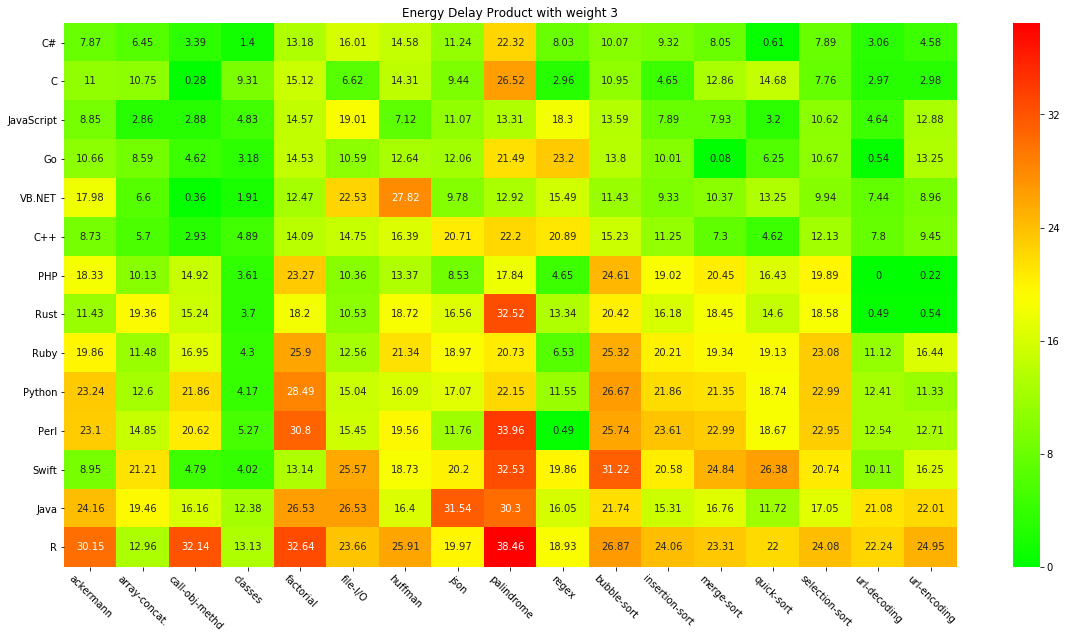

In [276]:
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.colors as mcolors

langaugesEDP=[""  for x in xrange(238)]
ProgrammingLanguages=[""  for x in xrange(238)]
ProgrammingTasks=[""  for x in xrange(238)]
langaugeArray=['C#', 'C', 'C++', 'Go', 'JavaScript', 'Java', 'Perl', 'PHP', 'Python', 'R', 'Ruby', 'Rust', 'Swift', 'VB.Net']
taskArray=['ackermann','array-concat.','call-obj-methd','classes','factorial','file-I/O','huffman','json','palindrome','regex','bubble-sort','insertion-sort','merge-sort','quick-sort','selection-sort','url-decoding','url-encoding']
                  
counter=0
with open(sys.argv[1]) as f:
#with open("/home/sgeorgiou/GitHub/Rosetta_Code_Research_MSR/Reports/Experiment_Data_Wed_Oct_11_11:24:29_UTC_2017/GraphData/Normalized_EDP_3.txt") as f:
    for line in f:
        line = line.replace(":","")
        line = line.replace(",","")
        data = re.split('\s+', line)
        data.pop(0)
        #print(data)
        for i in range(14):
            langaugesEDP[counter] = float(data[i])
            counter += 1
            
correctlySortedEDP=[[0 for x in range(17)] for y in range(14)] 
for i in range(14):
    for j in range (17):
        correctlySortedEDP[i][j] = langaugesEDP[i+(j*14)]
       
reorderindSortedEDPList=[[0 for x in range(17)] for y in range(14)]   
dummyArray=[0 for x in range(14)]
average=0
for i in range(14):
    for j in range (17):
        average += correctlySortedEDP[i][j]
    dummyArray[i]= average/17
    average=0
dummyArray.sort()
   

total=0
average=0
for i in range(14):
    for j in range (17):
        total += correctlySortedEDP[i][j]
    average = total/17
    for k in range(14):
        if dummyArray[k] == average:
            for l in range(17):
               reorderindSortedEDPList[k][l] = correctlySortedEDP[i][l]
    total=0
    

#ProgrammingLanguagesReIndex=['C#', 'C#', 'C#', 'C#', 'C#', 'C#', 'C#', 'C#', 'C#', 'C#', 'C#', 'C#', 'C#', 'C#', 'C#', 'C#', 'C#', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C','JavaScript', 'JavaScript', 'JavaScript', 'JavaScript', 'JavaScript', 'JavaScript', 'JavaScript', 'JavaScript', 'JavaScript', 'JavaScript', 'JavaScript', 'JavaScript', 'JavaScript', 'JavaScript', 'JavaScript', 'JavaScript', 'JavaScript', 'Go', 'Go', 'Go', 'Go', 'Go', 'Go', 'Go', 'Go', 'Go', 'Go', 'Go', 'Go', 'Go', 'Go', 'Go', 'Go', 'Go','VB.Net', 'VB.Net', 'VB.Net', 'VB.Net', 'VB.Net', 'VB.Net', 'VB.Net', 'VB.Net', 'VB.Net', 'VB.Net', 'VB.Net', 'VB.Net', 'VB.Net', 'VB.Net', 'VB.Net', 'VB.Net', 'VB.Net','C++', 'C++', 'C++', 'C++', 'C++', 'C++', 'C++', 'C++', 'C++', 'C++', 'C++', 'C++', 'C++', 'C++', 'C++', 'C++', 'C++','PHP', 'PHP', 'PHP', 'PHP', 'PHP', 'PHP', 'PHP', 'PHP', 'PHP', 'PHP', 'PHP', 'PHP', 'PHP', 'PHP', 'PHP', 'PHP', 'PHP','Rust', 'Rust', 'Rust', 'Rust', 'Rust', 'Rust', 'Rust', 'Rust', 'Rust', 'Rust', 'Rust', 'Rust', 'Rust', 'Rust', 'Rust', 'Rust', 'Rust','Ruby', 'Ruby', 'Ruby', 'Ruby', 'Ruby', 'Ruby', 'Ruby', 'Ruby', 'Ruby', 'Ruby', 'Ruby', 'Ruby', 'Ruby', 'Ruby', 'Ruby', 'Ruby', 'Ruby',  'Python', 'Python', 'Python', 'Python', 'Python', 'Python', 'Python', 'Python', 'Python', 'Python', 'Python', 'Python', 'Python', 'Python', 'Python', 'Python', 'Python', 'Perl', 'Perl', 'Perl', 'Perl', 'Perl', 'Perl', 'Perl', 'Perl', 'Perl', 'Perl', 'Perl', 'Perl', 'Perl', 'Perl', 'Perl', 'Perl', 'Perl','Swift', 'Swift', 'Swift', 'Swift', 'Swift', 'Swift', 'Swift', 'Swift', 'Swift', 'Swift', 'Swift', 'Swift', 'Swift', 'Swift', 'Swift', 'Swift', 'Swift','Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java', 'Java','R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R','R']
ProgrammingLanguagesReIndex=['C#','C', 'JavaScript','Go', 'VB.NET', 'C++', 'PHP', 'Rust' , 'Ruby', 'Python', 'Perl', 'Swift', 'Java', 'R']
cmap1 = mcolors.LinearSegmentedColormap.from_list("n",['#00FF00','#12FF00','#24FF00','#35FF00','#47FF00','#58FF00','#6AFF00','#7CFF00','#8DFF00','#9FFF00','#B0FF00','#C2FF00','#D4FF00','#E5FF00','#F7FF00','#FFF600','#FFE400','#FFD300','#FFC100','#FFAF00','#FF9E00','#FF8C00','#FF7B00','#FF6900','#FF5700','#FF4600','#FF3400','#FF2300','#FF1100','#FF0000',
])

plt.figure(figsize=(20, 10))
df = pd.DataFrame( reorderindSortedEDPList, index=ProgrammingLanguagesReIndex, columns=taskArray)
sns.heatmap(df, annot=True, fmt="g", cmap=cmap1)
plt.xticks(rotation=-45)
plt.title("Energy Delay Product with weight 3")
plt.savefig('Normalized_Results_EDP_3_HeatMap_Logarithmic_Function.png')

plt.show()

In [265]:
?df?dataframe